# Ordered Reduced Binary Decision Diagrams

BDDs são uma maneira computacionalmente conveniente de se representar funções lógicas.

Os BDDs são grafos formados por um conjunto de vértices e um conjunto de arestas. 

Existem dois tipos de vértices:

1. Variáveis
Os nodos em forma de elipse representam variáveis de uma expressão booleana.

2. Terminais
Os nodos em forma retangular representam os valores booleanos, 0 e 1. 

Existem dois tipos de arestas:

1. Sólidas
Representa que variável de onde a aresta sai é verdadeira.

2. Tracejadas
Representa que variável de onde a aresta sai é falsa.

O módulo BDD, importado na linha seguir, implementa esta estrutura de dados.

In [12]:
from BDD import *

# BDDs elementares

Os BDDs para os valores lógicos e expressões com apenas uma variável são considerados elementares.

São exemplos de BDDs elementares:

1. Os BDDs para os valores 0 (ou falso) e 1 (verdadeiro).

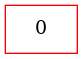

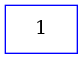

In [14]:
plotbdd(ZERO)
plotbdd(ONE)

2. BDDS com somente uma variável, como os bdds para as expressões $a$ e $b$.

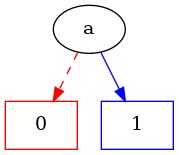

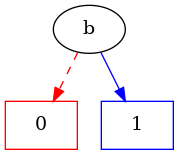

In [15]:
a = BDD('a', ZERO, ONE)
b = BDD('b', ZERO, ONE)
plotbdd(a)
plotbdd(b)

# Composição de BDDs através de operações lógicas

A partir da composição de BDDs usando operações lógicas é possível criar os BDDs para qualquer expressão lógica.
 
Os exemplos a seguir mostram casos de aplicação das operação de negação ($\neg$), and ($\land$) e or ($\lor$).
O algoritmo pode ser estudado no arquivo BBB.py.

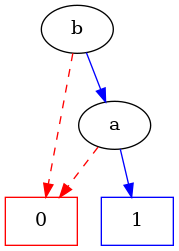

In [2]:
plotbdd(a.land(b))


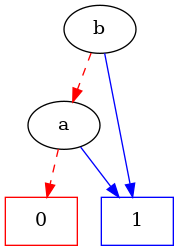

In [3]:
plotbdd(a.lor(b))

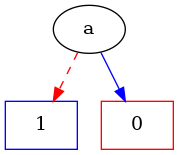

In [4]:
plotbdd(a.negate())

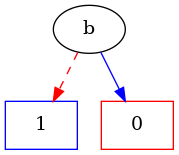

In [5]:
plotbdd(b.negate())

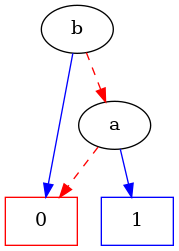

In [6]:
# A && ~B

plotbdd(a.land(b.negate()))

# A operação xor

O BDD abaixo representa a função lógica ou exclusivo, definida como $a \oplus b = (a \land \neg b) \lor (\neg a \land b)$.

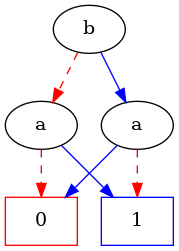

In [18]:
# A xor B

xor_bdd = a.land(b.negate()).lor(a.negate().land(b))

plotbdd(xor_bdd)

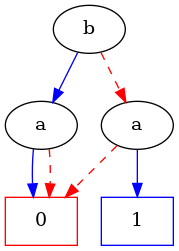

In [19]:
plotbdd(xor_bdd.land(a))

# Ordenação de variáveis e simplificação de BDDs

A formulação dos algoritmos das operações and e or apresentados aqui já garantem a ordem das variáveis nos BDDs.

Isto é, a operação land e a operação or vão garantir que as variáveis estarão sempre na mesma ordem. No algoritmo apresentado, está sendo usado a ordem lexicográfica. Quando o nome de uma variável ocorre depois de outro, ele estará acima no BDD.

A ordenação dos BDDs em conjunto com a simplificação dá uma propriedade muito interessante aos BDDs: Os BDDs são uma representação canônica.

Isto é: Se um BDD estiver ordenado e simplificado, é garantido que duas expressões lógicas equivalentes só serão equivalentes se e somente se eles tem o mesmo ORBDD.

O exemplo abaixo apresenta a simplificação do BDD mostrado acima.

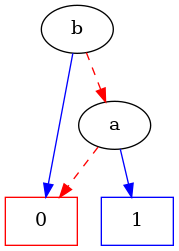

In [20]:
plotbdd(simplify(xor_bdd.land(a)))

# Importância dos BDDs para a verificação funcional

Os ORBDDs são importantes para a verificação funcional de sistemas digitais. Ao calcular os ORBDDs de duas expressões lógicas distintas, se os ORBDDs são iguais, significa que a expressão lógica é equivalente.

O exemplo abaixo executa a verificação funcional entre a expressão $(a \oplus b) \land a$ e a expressão $a \land \neg b$.

LEFT:


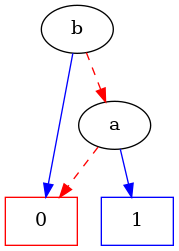

RIGHT:


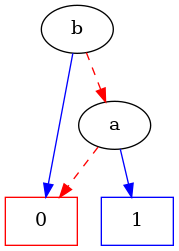

RESULT: True


True

In [21]:
check(xor_bdd.land(a), a.land(b.negate()))